In [1]:
import networkx as nx
import numpy as np
import pandas as pd
from data_loader import *
import igraph as ig
import config
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
G = read_pkl_graph("graph_no_attributes.pkl")

Error: Canceled future for execute_request message before replies were done

In [ ]:
_p = load_profile_data(config.PROFILES_PATH)
P = profile_data_to_df(_p)

In [51]:
# match nodes with attributes

In [56]:
P2 = P.copy()
P2.dropna(inplace=True)
P2 = P2.astype({'user_id':str, 'gender':'int64', 'age':'int64'})
user_ids = P2['user_id'].to_list()
P2.set_index('user_id', inplace=True)

In [ ]:
for v in G.vs:
    if v['name'] in user_ids:
        v['gender'] = P2.loc[v['name']][0]

In [ ]:
### implement random walk sampler first!

In [ ]:
# implement random walk

#### EDA Plots

In [4]:
num_males = len(P[P['gender'] == '1'])
print(num_males)

804336


In [5]:
num_females = len(P) - num_males
num_females2 = len(P[P['gender'] == '0'])
print(num_females)
print(num_females2)

828467
828304


In [36]:
assert num_males + num_females == G.vcount()

In [14]:
h = G.degree_distribution(bin_width=100)

In [15]:
print(h)

N = 1632803, mean +- sd: 37.5092 +- 59.5256
Each * represents 28330 items
[    0,   100): **************************************************** (1473176)
[  100,   200): **** (127482)
[  200,   300):  (24106)
[  300,   400):  (5604)
[  400,   500):  (1471)
[  500,   600):  (477)
[  600,   700):  (206)
[  700,   800):  (100)
[  800,   900):  (67)
[  900,  1000):  (45)
[ 1000,  1100):  (36)
[ 1100,  1200):  (7)
[ 1200,  1300):  (6)
[ 1300,  1400):  (4)
[ 1400,  1500):  (2)
[ 1500,  1600):  (1)
[ 1600,  1700):  (0)
[ 1700,  1800):  (3)
[ 1800,  1900):  (0)
[ 1900,  2000):  (0)
[ 2000,  2100):  (1)
[ 2100,  2200):  (0)
[ 2200,  2300):  (0)
[ 2300,  2400):  (0)
[ 2400,  2500):  (1)
[ 2500,  2600):  (0)
[ 2600,  2700):  (0)
[ 2700,  2800):  (0)
[ 2800,  2900):  (0)
[ 2900,  3000):  (0)
[ 3000,  3100):  (0)
[ 3100,  3200):  (0)
[ 3200,  3300):  (0)
[ 3300,  3400):  (0)
[ 3400,  3500):  (0)
[ 3500,  3600):  (0)
[ 3600,  3700):  (0)
[ 3700,  3800):  (0)
[ 3800,  3900):  (0)
[ 3900,  4000):  (0)


In [16]:
b = list(h.bins())

In [38]:
bins = np.array([i[0] for i in b][0:10])
vals = np.array([i[-1] for i in b])

In [39]:
vals_freq = (vals / np.sum(vals))[0:10]

In [40]:
vals_freq

array([9.02237441e-01, 7.80755547e-02, 1.47635692e-02, 3.43213480e-03,
       9.00904763e-04, 2.92135671e-04, 1.26163413e-04, 6.12443755e-05,
       4.10337316e-05, 2.75599690e-05])

In [ ]:
degrees = [G.degree(n) for n in G.vs if G.degree(n) < 1000]

C:\Users\timod\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


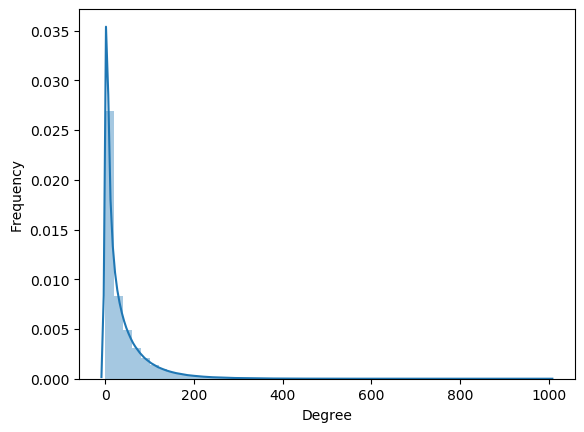

In [51]:
sns.distplot(degrees)
plt.ylabel('Frequency')
plt.xlabel('Degree')
plt.show()

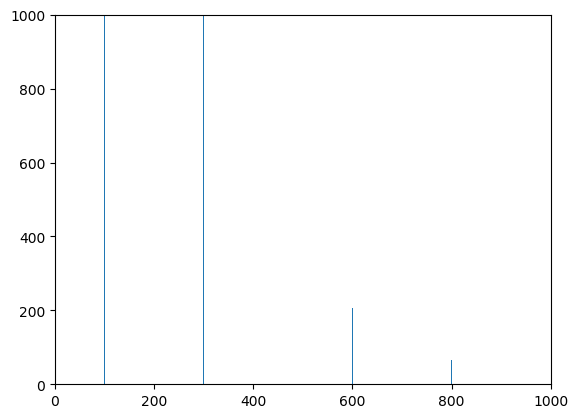

In [24]:
plt.bar(bins, vals)
plt.xlim(left=0, right=1000)
plt.ylim(bottom=0, top=1000)
plt.show()

In [ ]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    sns.distplot(degrees)
    plt.ylabel('Frequency')
    plt.xlabel('Degree')
    plt.show()

In [ ]:
plot_degree_dist(nG)